In [2]:
# dataset interface should be {'train', 'dev', 'test'?, 'X_column', 'label_column'}
import pandas as pd
from hamison_datasets.UPV.load_upv import load_upv_dataset

upv = load_upv_dataset()
# upv_notmapped = load_upv_dataset(map_values=False)

ds = upv[upv['text'].notnull()]
campañas = upv['¿Qué campaña?'].unique().tolist()

upv_features = ['1. Espacio',
                '2. Texto', '3. Multimedia', '4. Elemento desinformador',
                '5.  Tipo multimedia', '6. Alteración multimedia',
                '7. Cuenta emisora', '8. Fuente',
                '9. Protagonista', '10. Atributo',
                '11. Macro tema', '12. Populismo',
                '13. Ataque', '14. Tipo de ataque']
upv_features = [c for c in upv.columns if '.' in c]
# for feat in upv_features:
#     print(upv[feat].value_counts(), '\nTotal:',
#           upv[(upv['text'].notnull() & upv[feat].notnull())].shape[0], '\n')
upv.head(3)

Loaded UPV dataset from UPV_allURLs.csv
Loading html files...
Removing rows without html: [6668]


Extracting articles from HTML:   0%|          | 0/408 [00:00<?, ?it/s]

,Medio,Título desmentido,URL,Titular enlazado,¿Periodo de campaña?,¿Qué campaña?,¿Campaña?,Único,Duplicado misma campaña,Corpus,...,12. Populismo,13. Ataque,14. Tipo de ataque,5. Tipo multimedia reduced,7. Cuenta emisora reduced,9. Protagonista reduced,14. Tipo de ataque reduced,html,article,text
ID_Medio_Crono,,,,,,,,,,,,,,,,,,,,,
429,Maldito dato,"Es falso que Vox esté en el Gobierno ""en Casti...",https://maldita.es/malditodato/20191111/es-fal...,"Es falso que Vox esté en el Gobierno ""en Casti...",Sí,Gen19,Sí,Sí,No,Sí,...,Crítica a las élites,Sí,Electoral,NaN,Clase política de izquierdas,"Gobiernos, partidos y dirigentes de derecha",Electoral,"\n<!DOCTYPE html>\n\n<html lang=""es"">\n<head>\...","[\n, [\n, [\nMALDITO\n, <strong class=""section...",MALDITO\nDATO\n\nEs falso que Vox esté en el G...
258,Newtral Fact-checks,"""(Pablo) Iglesias ha votado 4 veces en contra ...",https://www.newtral.es/sanchez-iglesias-ha-vot...,"""(Pablo) Iglesias ha votado 4 veces en contra ...",Sí,Gen19,Sí,Sí,No,Sí,...,Defensa o apelación al pueblo,Sí,Antecedentes,NaN,Clase política de izquierdas,"Gobiernos, partidos y dirigentes de izquierda",Otros,"<!DOCTYPE html>\n<html lang=""es""><head><meta c...","[[\n, [ , <a class=""author vcard"" href=""https:...",Por María Blanco05 noviembre 2019 | 2 min l...
265,Newtral Fact-checks,"""Estáis gobernando conjuntamente con Vox en la...",https://www.newtral.es/maria-jesus-montero-sob...,"""Estáis gobernando conjuntamente con Vox en la...",Sí,Gen19,Sí,Sí,No,Sí,...,Ostracismo,Sí,Asociación,NaN,Clase política de izquierdas,"Gobiernos, partidos y dirigentes de derecha",Otros,"<!DOCTYPE html>\n<html lang=""es""><head><meta c...","[[\n, [ , <a class=""author vcard"" href=""https:...",Por Lorena Baeza08 noviembre 2019 | < 1 min...


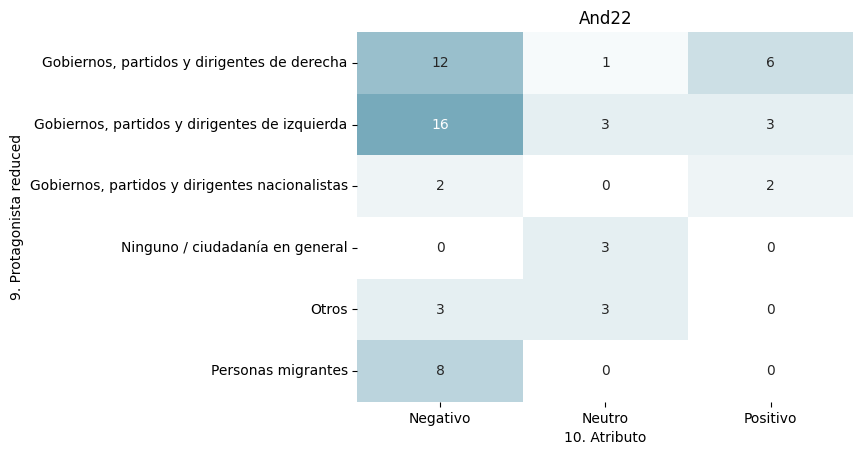

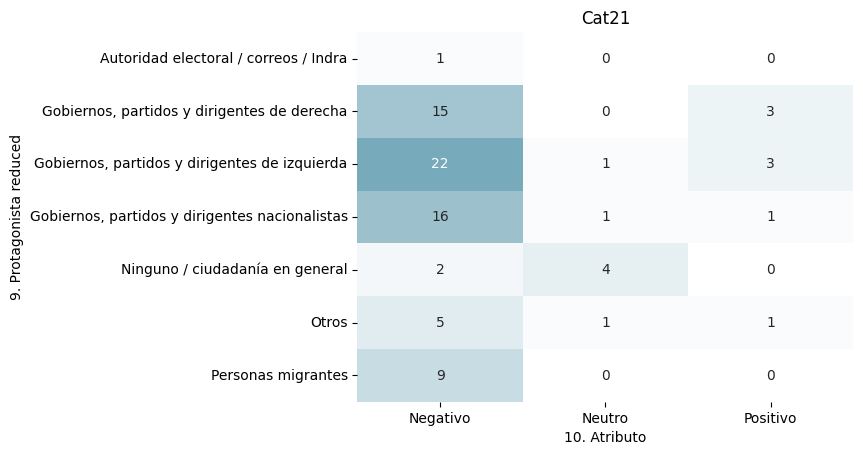

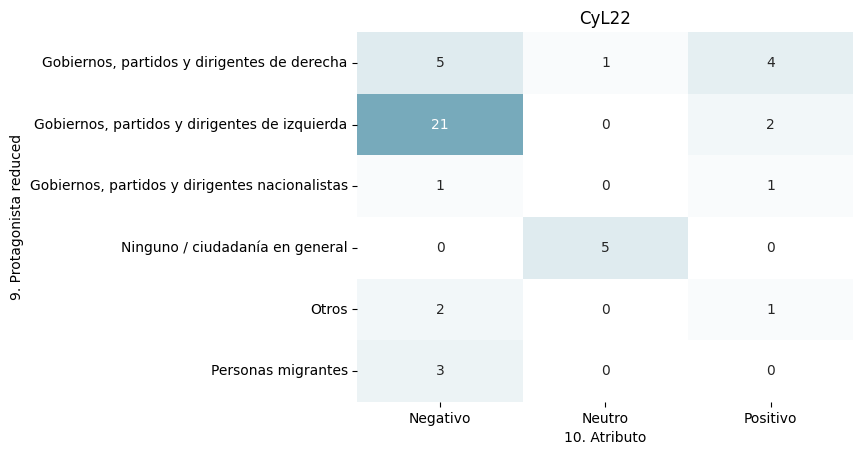

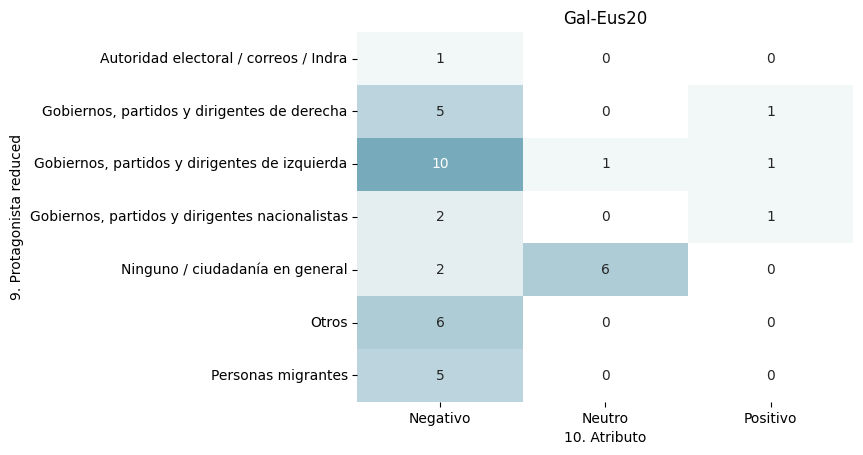

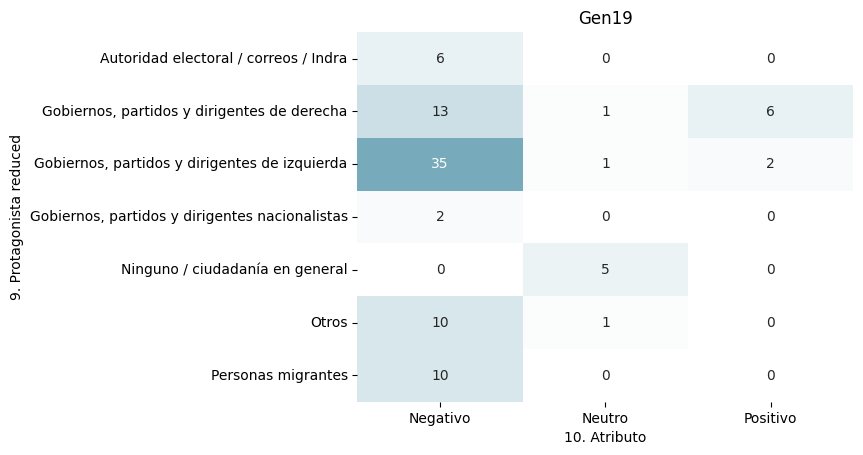

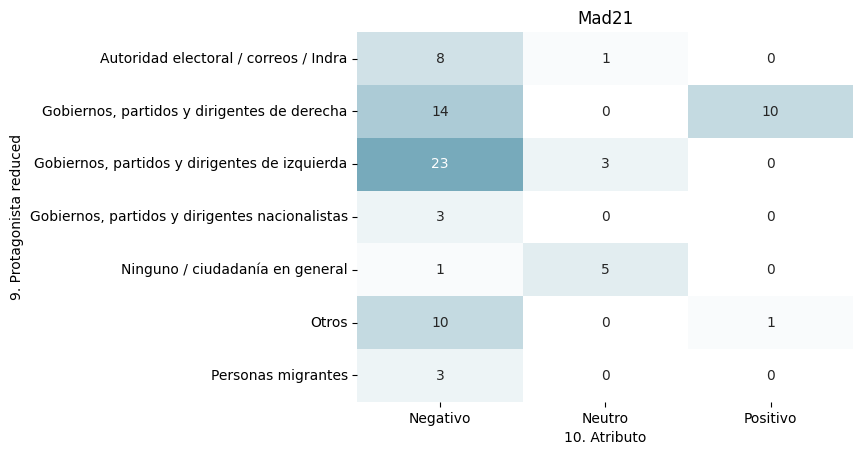

In [3]:
# 2-dimension plots
import seaborn as sns
import matplotlib.pyplot as plt

feat_groups = [
    # ['9. Protagonista', '10. Atributo'],
    ['9. Protagonista reduced', '10. Atributo'],
]
palette = sns.color_palette("blend:#fff,#7AB", as_cmap=True)
for g in feat_groups:
    for camp, h in upv.groupby('¿Qué campaña?'):
        g_vals = h[g].value_counts(sort=False).unstack().fillna(0).astype(int)
        # display(g_vals)
        g_plot = sns.heatmap(g_vals, cmap=palette,
                             annot=True, fmt="0", cbar=False)
        g_plot.set(title=camp)
        plt.show()
        f_name = '-'.join([c.split('.')[0] for c in g]) + f"_{camp}"
        g_plot.figure.savefig(f"2dplots/{f_name}.png")

9. Protagonista,"Gobiernos, partidos y dirigentes de derecha","Gobiernos, partidos y dirigentes de izquierda",Ninguno / ciudadanía en general,Empresas y empresariado,Personas migrantes,Autoridad electoral / correos / Indra,"Gobiernos, partidos y dirigentes nacionalistas",Ejército y FFCC de Seguridad del Estado,Jefatura del Estado,"Organismos supranacionales / Sistema político ,internacional",Movimientos sociales progresistas,Mujeres,Instituciones de salud,Otros,Medios de comunicación / periodistas progresistas,"Judicatura, Magistratura y Poder Judicial",Medios de comunicación / periodistas conservadores,Referentes públicos progresistas,Ciudadano concreto sin relevancia pública,Sindicatos y sindicalistas
¿Qué campaña?,,,,,,,,,,,,,,,,,,,,
Gen19,20.0,38.0,5.0,3.0,10.0,6.0,2.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Gal-Eus20,6.0,12.0,8.0,0.0,5.0,1.0,3.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Cat21,18.0,26.0,6.0,0.0,9.0,1.0,18.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Mad21,24.0,26.0,6.0,0.0,3.0,9.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0
CyL22,10.0,23.0,5.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
And22,19.0,22.0,3.0,1.0,8.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


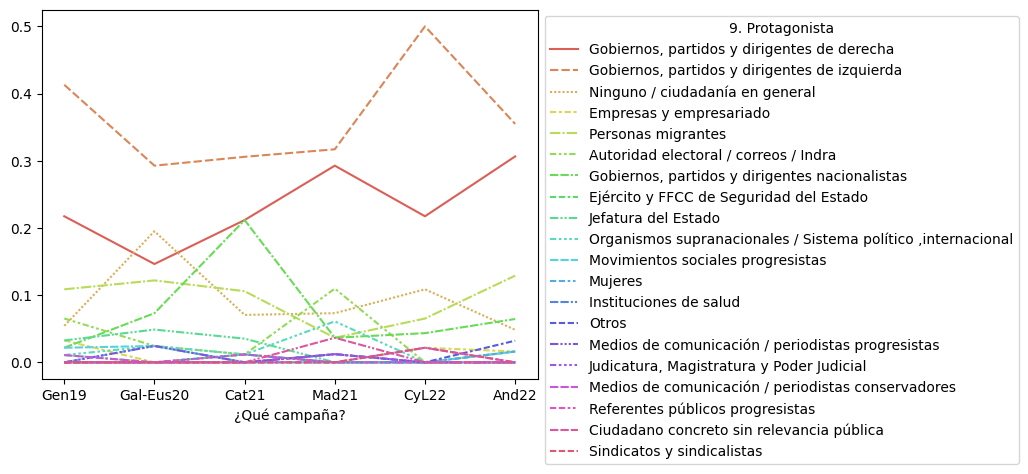

<Figure size 640x480 with 0 Axes>

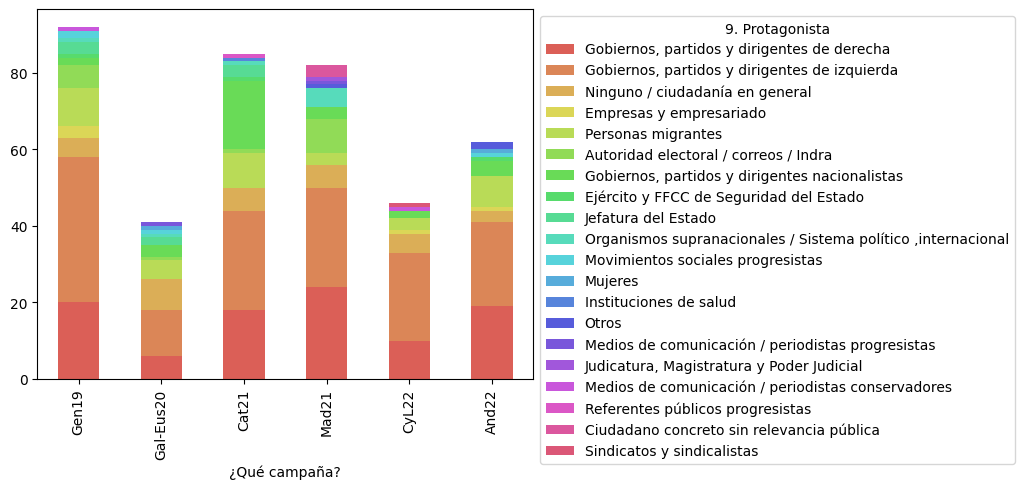

9. Protagonista reduced,"Gobiernos, partidos y dirigentes de derecha","Gobiernos, partidos y dirigentes de izquierda",Ninguno / ciudadanía en general,Otros,Personas migrantes,Autoridad electoral / correos / Indra,"Gobiernos, partidos y dirigentes nacionalistas"
¿Qué campaña?,,,,,,,
Gen19,20.0,38.0,5.0,11.0,10.0,6.0,2.0
Gal-Eus20,6.0,12.0,8.0,6.0,5.0,1.0,3.0
Cat21,18.0,26.0,6.0,7.0,9.0,1.0,18.0
Mad21,24.0,26.0,6.0,11.0,3.0,9.0,3.0
CyL22,10.0,23.0,5.0,3.0,3.0,0.0,2.0
And22,19.0,22.0,3.0,6.0,8.0,0.0,4.0


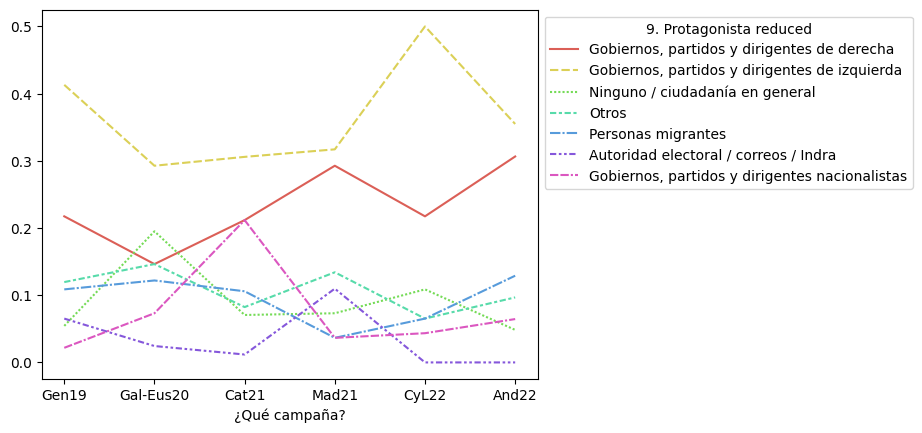

<Figure size 640x480 with 0 Axes>

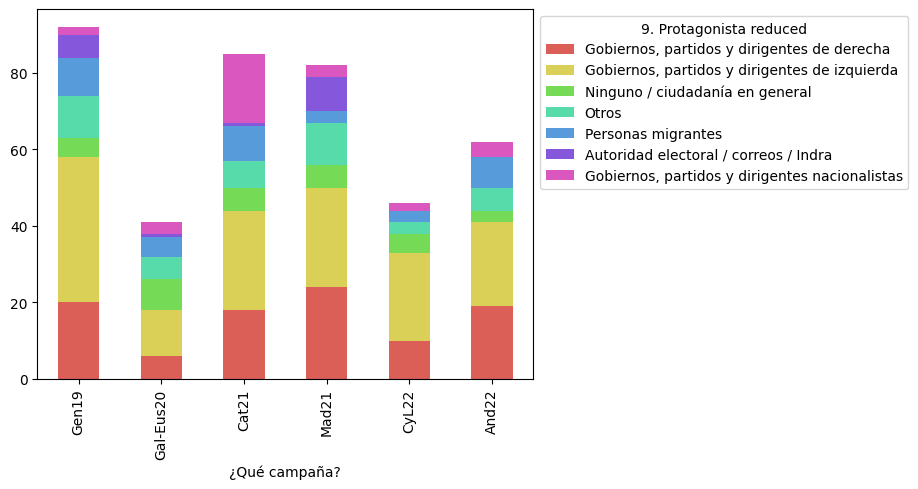

10. Atributo,Negativo,Positivo,Neutro
¿Qué campaña?,,,
Gen19,76,8,8
Gal-Eus20,31,3,7
Cat21,70,8,7
Mad21,62,11,9
CyL22,32,8,6
And22,41,11,10


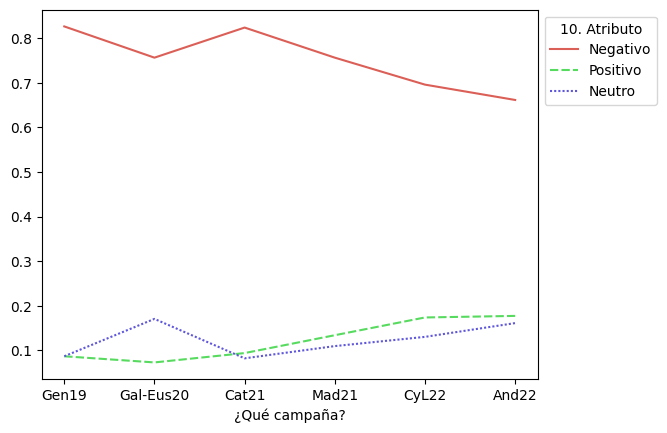

<Figure size 640x480 with 0 Axes>

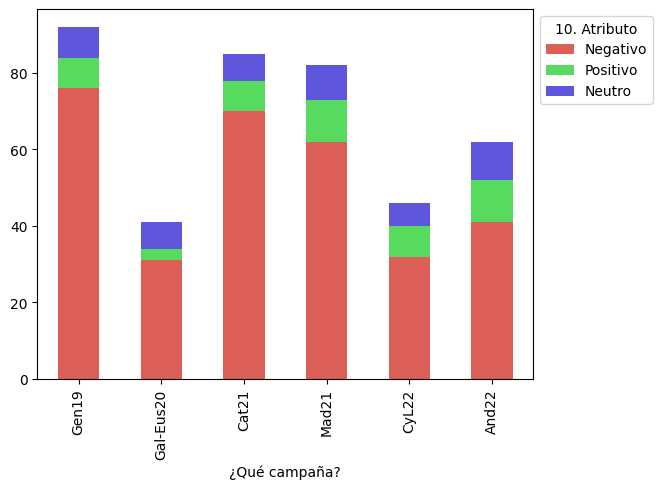

11. Macro tema,Campaign issues,Political issues,Policy issues,Personal issues
¿Qué campaña?,,,,
Gen19,19.0,23.0,44.0,6.0
Gal-Eus20,4.0,16.0,21.0,0.0
Cat21,9.0,24.0,46.0,6.0
Mad21,18.0,18.0,41.0,5.0
CyL22,2.0,12.0,29.0,3.0
And22,4.0,17.0,38.0,3.0


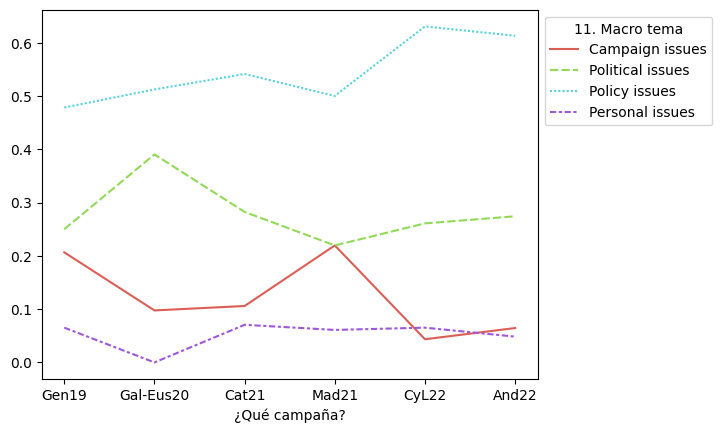

<Figure size 640x480 with 0 Axes>

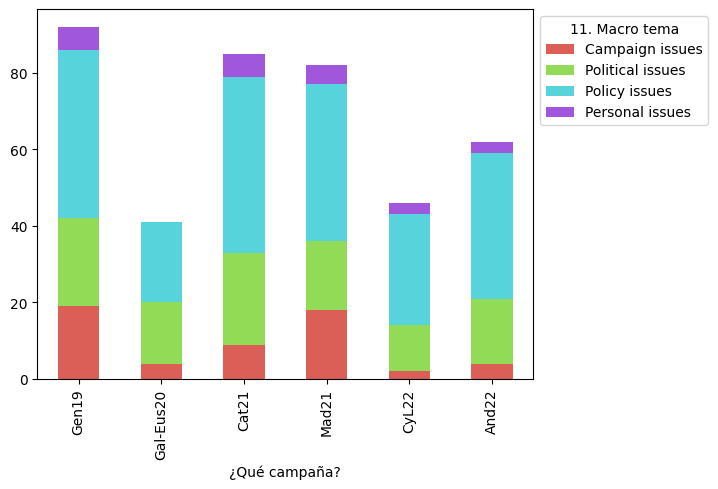

12. Populismo,Crítica a las élites,Defensa o apelación al pueblo,Ostracismo,Apelación a los valores patrióticos
¿Qué campaña?,,,,
Gen19,43,26,18,5
Gal-Eus20,21,6,13,1
Cat21,46,16,17,6
Mad21,51,18,9,4
CyL22,20,15,7,4
And22,29,15,13,5


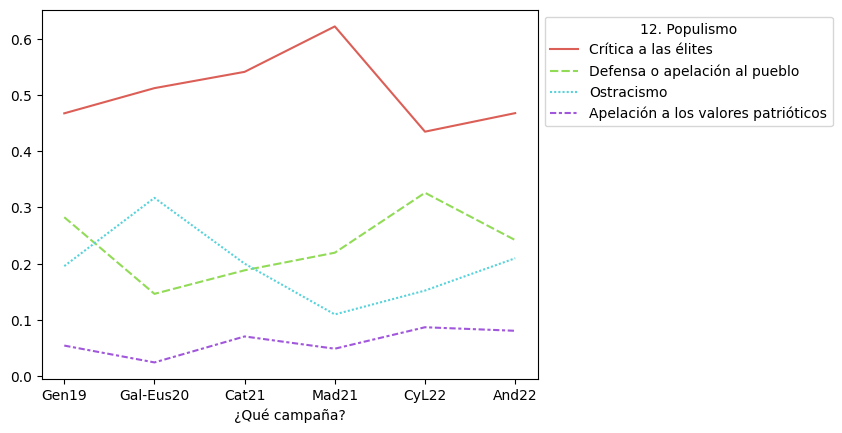

<Figure size 640x480 with 0 Axes>

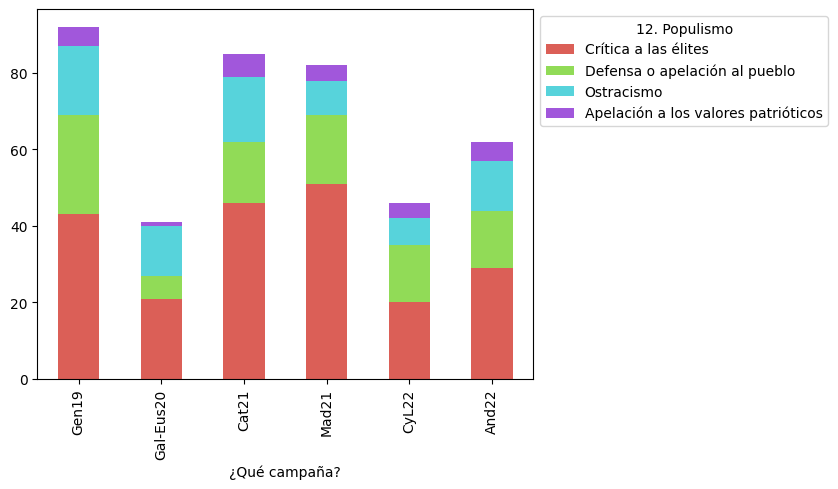

13. Ataque,Sí,No
¿Qué campaña?,,
Gen19,43,49
Gal-Eus20,14,27
Cat21,43,42
Mad21,32,50
CyL22,26,20
And22,30,32


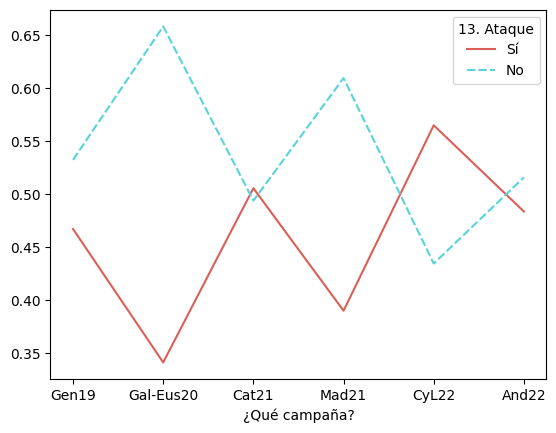

<Figure size 640x480 with 0 Axes>

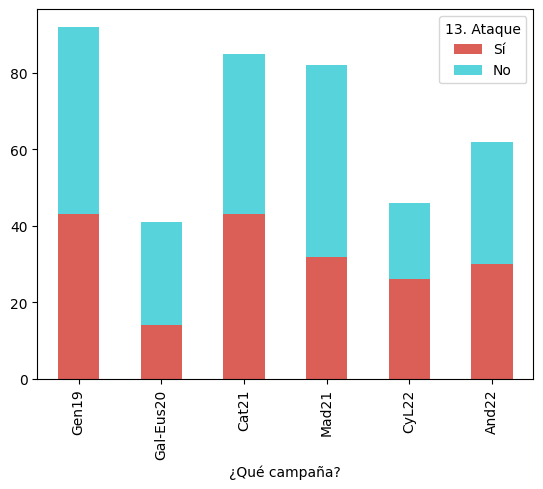

14. Tipo de ataque,Electoral,Antecedentes,Asociación,Sin ataque,Ideológico,De gestión,Personal,Programa
¿Qué campaña?,,,,,,,,
Gen19,10.0,3.0,4.0,49.0,12.0,7.0,4.0,3.0
Gal-Eus20,0.0,0.0,0.0,27.0,4.0,7.0,2.0,1.0
Cat21,1.0,4.0,0.0,42.0,18.0,14.0,4.0,2.0
Mad21,5.0,2.0,1.0,50.0,9.0,10.0,5.0,0.0
CyL22,1.0,1.0,1.0,20.0,9.0,10.0,3.0,1.0
And22,2.0,2.0,0.0,32.0,13.0,9.0,2.0,2.0


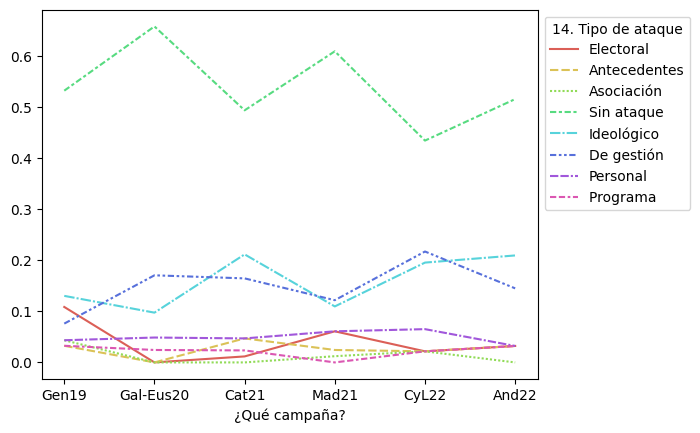

<Figure size 640x480 with 0 Axes>

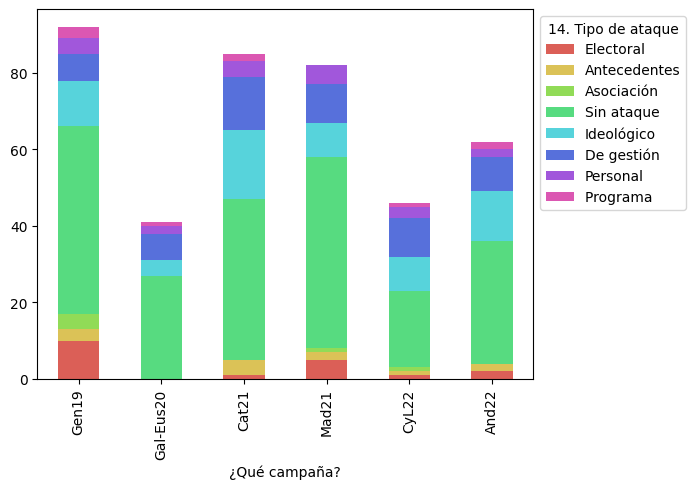

14. Tipo de ataque reduced,Electoral,Otros,Sin ataque,Ideológico,De gestión,Personal
¿Qué campaña?,,,,,,
Gen19,10.0,10.0,49.0,12.0,7.0,4.0
Gal-Eus20,0.0,1.0,27.0,4.0,7.0,2.0
Cat21,1.0,6.0,42.0,18.0,14.0,4.0
Mad21,5.0,3.0,50.0,9.0,10.0,5.0
CyL22,1.0,3.0,20.0,9.0,10.0,3.0
And22,2.0,4.0,32.0,13.0,9.0,2.0


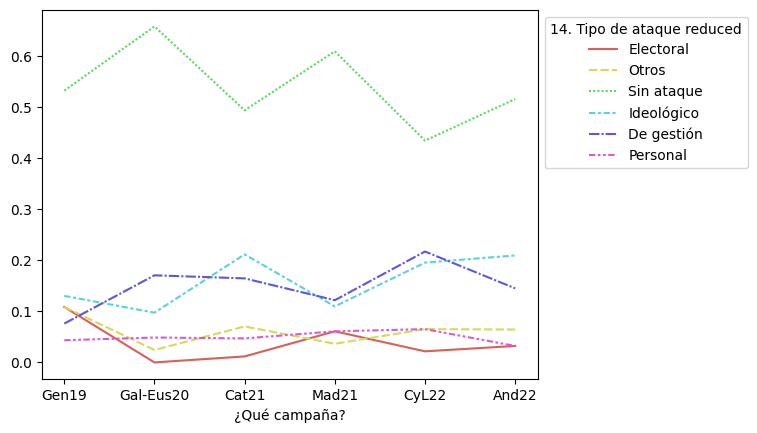

<Figure size 640x480 with 0 Axes>

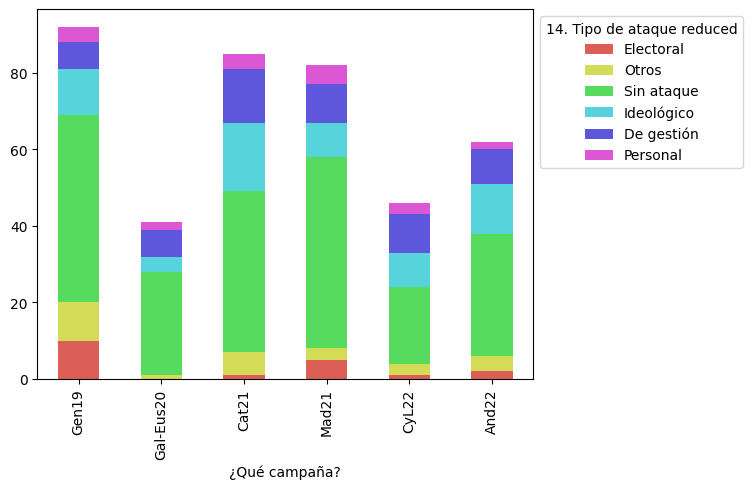

<Figure size 640x480 with 0 Axes>

In [4]:
# 1-d plots
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

upv_features = [
    # '1. Espacio',
    # '2. Texto', '3. Multimedia', '4. Elemento desinformador',
    # '5.  Tipo multimedia', '6. Alteración multimedia',
    # '7. Cuenta emisora', '8. Fuente',
    '9. Protagonista',
    '9. Protagonista reduced',
    '10. Atributo',
    '11. Macro tema', '12. Populismo',
    '13. Ataque', '14. Tipo de ataque',
    '14. Tipo de ataque reduced',
]


for feat in upv_features:
    grouped = upv.groupby('¿Qué campaña?', sort=False)[feat]
    counts = grouped.value_counts(normalize=False).unstack().fillna(0)
    norm_counts = grouped.value_counts(normalize=True).unstack().fillna(0)
    display(counts)

    palette = sns.color_palette("hls", len(counts.columns))

    # lineplot = norm_counts.plot.line(colormap=palette)
    lineplot = sns.lineplot(norm_counts, palette=palette)
    if len(counts.columns) > 2:
        sns.move_legend(lineplot, "upper left", bbox_to_anchor=(1, 1))

    lines_f_name = feat.split('.')[0] + '_lines'
    lineplot.figure.savefig(f"1dplots/{lines_f_name}.png")

    plt.show()
    plt.clf()

    # stacked = sns.histplot(counts, x='¿Qué campaña?',
    #    multiple='stack', palette=palette)
    stacked = counts.plot.bar(stacked=True, color=palette)
    if len(counts.columns) > 2:
        sns.move_legend(stacked, "upper left", bbox_to_anchor=(1, 1))

    bars_f_name = feat.split('.')[0] + '_bars'
    stacked.figure.savefig(f"1dplots/{bars_f_name}.png")

    plt.show()
    plt.clf()
    # display(lineplot)
    # display(stacked)

    # for name, g in upv.groupby('¿Qué campaña?'):
    #     display(g[feat].value_counts(normalize=True))
    # display(upv[feat].value_counts(dropna=False).plot())
    # display(upv[feat].describe())

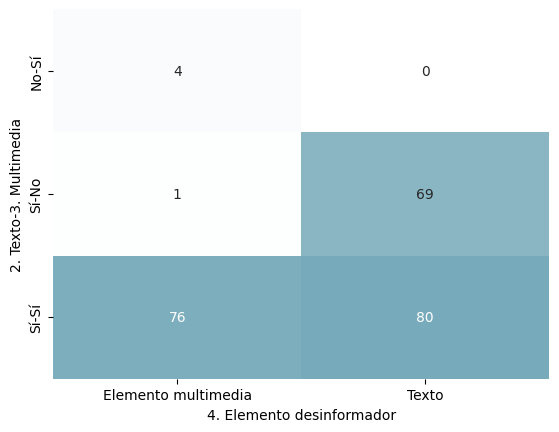

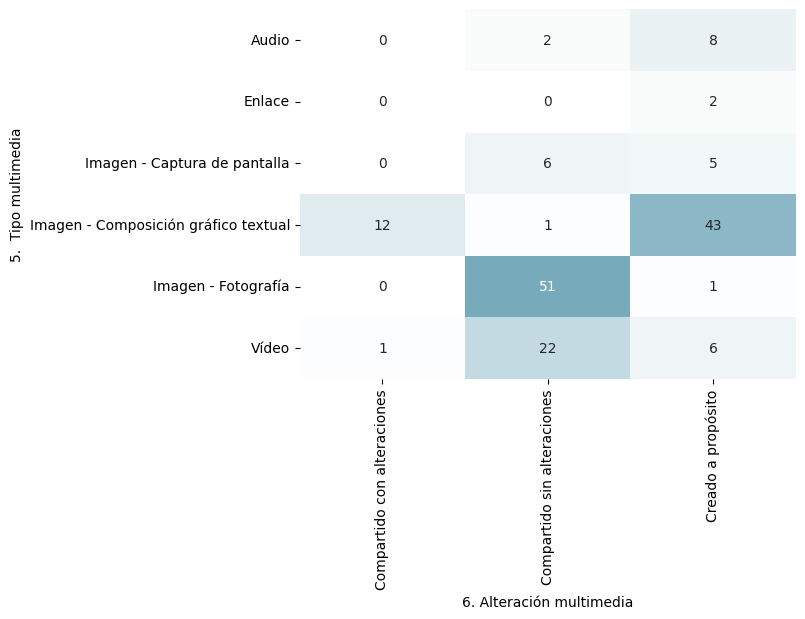

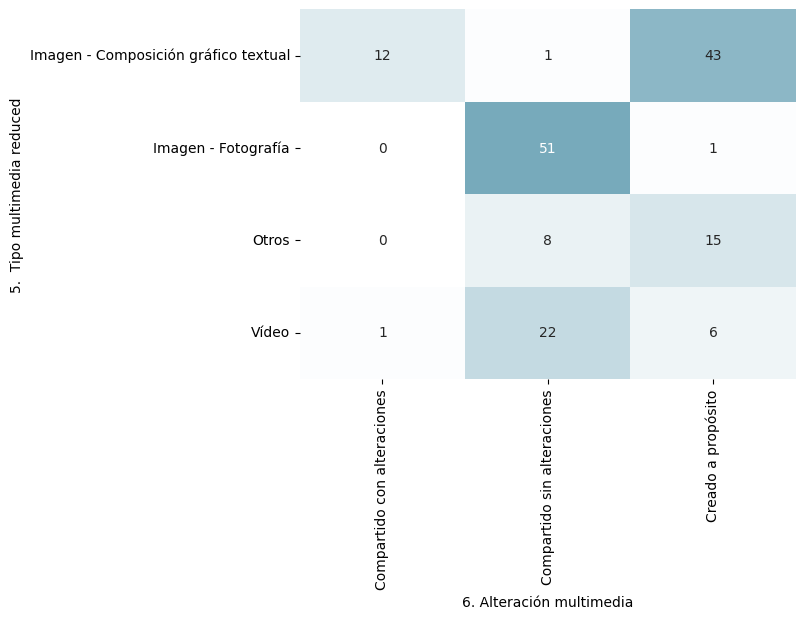

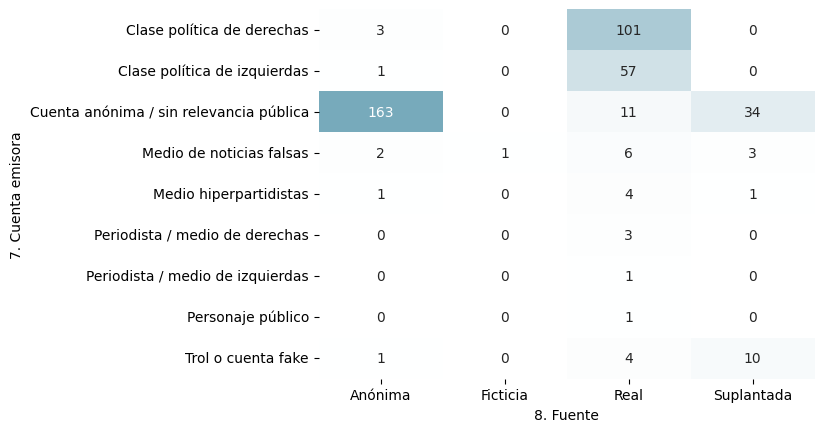

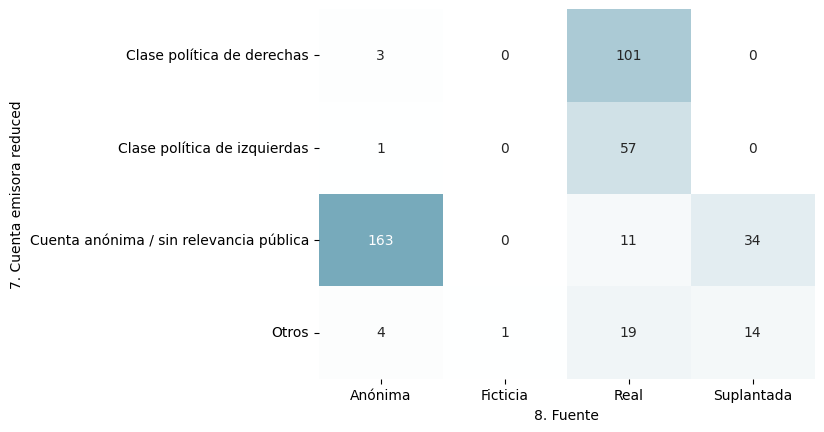

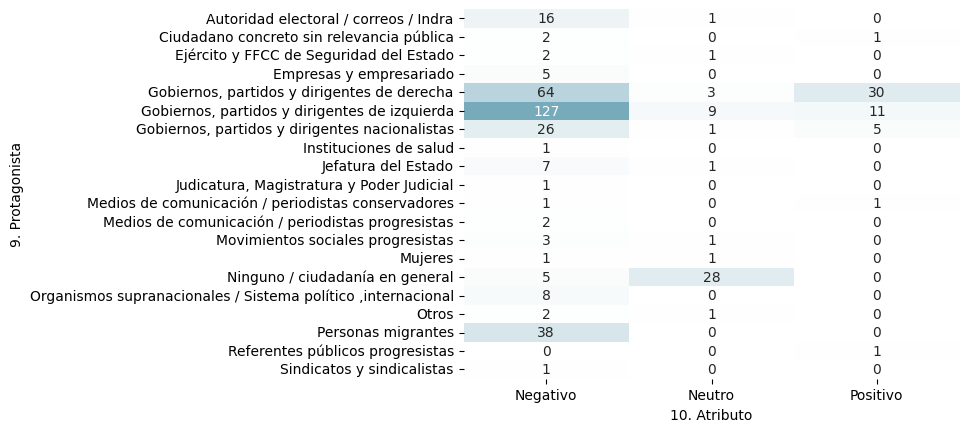

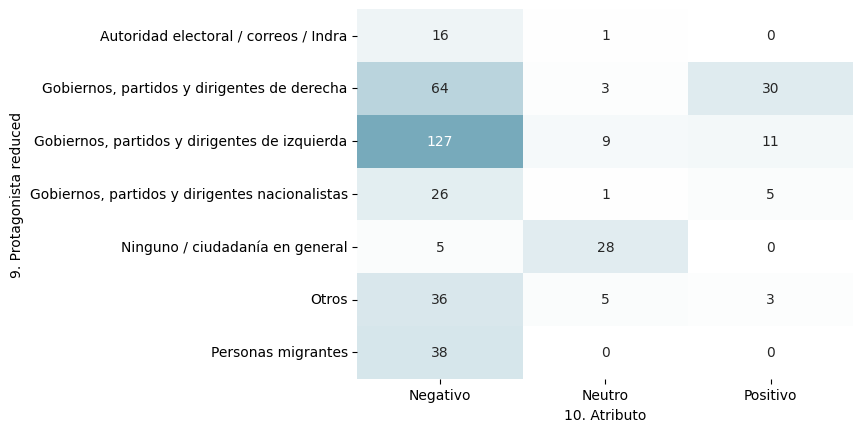

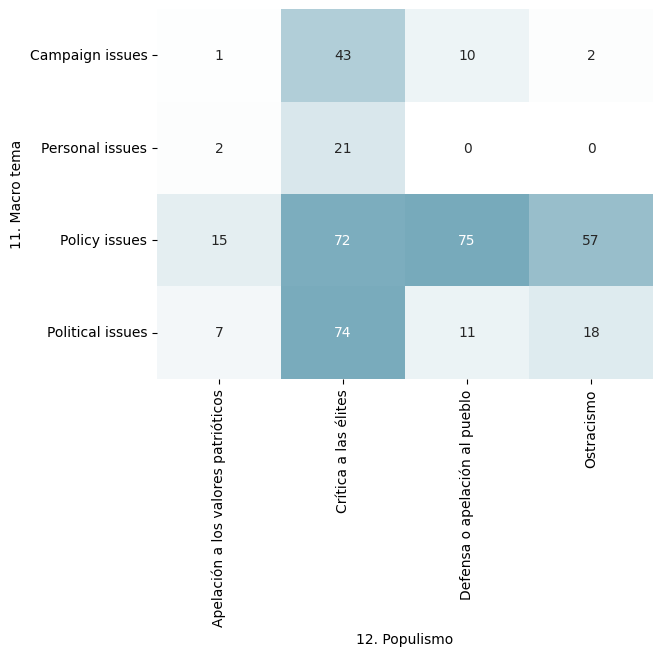

In [ ]:
# 2-dimension plots
import seaborn as sns
import matplotlib.pyplot as plt

feat_groups = [
    ['2. Texto', '3. Multimedia', '4. Elemento desinformador'],
    # ['3. Multimedia', '5.  Tipo multimedia'],
    ['5.  Tipo multimedia', '6. Alteración multimedia'],
    ['5.  Tipo multimedia reduced', '6. Alteración multimedia'],
    ['7. Cuenta emisora', '8. Fuente'],
    ['7. Cuenta emisora reduced', '8. Fuente'],
    ['9. Protagonista', '10. Atributo'],
    ['9. Protagonista reduced', '10. Atributo'],
    ['11. Macro tema', '12. Populismo'],
    # ['13. Ataque', '14. Tipo de ataque']
    # ['13. Ataque reduced', '14. Tipo de ataque']
]
palette = sns.color_palette("blend:#fff,#7AB", as_cmap=True)
for g in feat_groups:
    g_vals = upv[g].value_counts(sort=False).unstack().fillna(0).astype(int)
    # display(g_vals)
    g_plot = sns.heatmap(g_vals, cmap=palette,
                         annot=True, fmt="0", cbar=False)
    plt.show()
    f_name = '-'.join([c.split('.')[0] for c in g])
    g_plot.figure.savefig(f"2dplots/{f_name}.png")